In [2]:
from transformers import CLIPProcessor, CLIPModel
from PIL import Image

In [3]:
# import model
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch16")

# import processor (handles text tokenization and image preprocessing)
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch16") 

# 0-shot Image Classification

In [5]:
# load image
image = Image.open("test_images/car.jpg")

# define text classes
text_classes = ["Sports car", "Vintage car"]

In [6]:
# pass image and text classes to processor
inputs = processor(text=text_classes, images=image, return_tensors="pt", 
                                                    padding=True)

# pass inputs to CLIP
outputs = model(**inputs) # note: "**" unpacks dictionary items

In [7]:
# image-text similarity score
logits_per_image = outputs.logits_per_image 
# convert scores to probs via softmax
probs = logits_per_image.softmax(dim=1) 

In [8]:
# print prediction
predicted_class = text_classes[probs.argmax()]
print(predicted_class, "| Probability = ", 
                       round(float(probs[0][probs.argmax()]),4))

Sports car | Probability =  0.9698


# Image Search

In [9]:
# create list of images to search over
image_name_list = ["test_images/car.jpg", "test_images/football.jpeg", "test_images/ps5.jpg"]

image_list = []
for image_name in image_name_list:
    image_list.append(Image.open(image_name))

In [10]:
# define a query
query = "gaming console"

# pass images and query to CLIP
inputs = processor(text=query, images=image_list, return_tensors="pt", 
                                                  padding=True)

In [11]:
# compute logits and probabilities
outputs = model(**inputs)
logits_per_text = outputs.logits_per_text
probs = logits_per_text.softmax(dim=1)

In [12]:
# print best match
best_match = image_list[probs.argmax()]
prob_match = round(float(probs[0][probs.argmax()]),4)

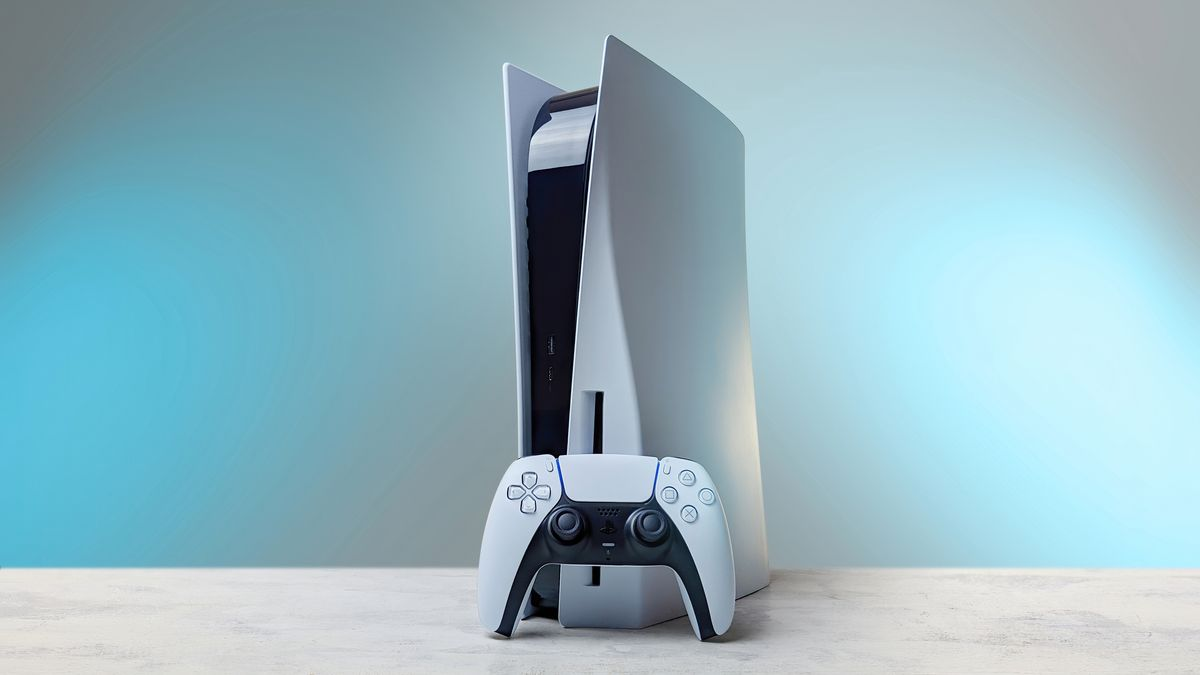

In [13]:
best_match